# Word2Vec

The data in IA3-1.csv has the information about 11914 cars. There are two fields: Maker_Model and description. The description column contains a set of tags (separated by comma) where the Maker_Model is also included.

## 1. Prepare the data for a gensim Word2Vec model

In [1]:
import pandas as pd
import gensim

In [2]:
df = pd.read_csv('IA3-1.csv')
df.head()

description     Maker_Model
0  premium unleaded (required),MANUAL,rear wheel ...  BMW 1 Series M
1  premium unleaded (required),MANUAL,rear wheel ...    BMW 1 Series
2  premium unleaded (required),MANUAL,rear wheel ...    BMW 1 Series
3  premium unleaded (required),MANUAL,rear wheel ...    BMW 1 Series
4  premium unleaded (required),MANUAL,rear wheel ...    BMW 1 Series

In [4]:
tags = [ row.split(',') for row in df['description']]
tags

[['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Factory Tuner',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series M'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Convertible',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Compact',
  'Convertible',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Convertible',
  'BMW 1 Serie

## 2. Run the model (with size = 50) and display the vector for ‘Toyota Camry’) 

In [5]:
# min_count: word appearance >= 1
# vector_size: num of dimensions of a vector
# workers: num cores to compute
# window: n-gram window size
# sg: use skip-gram
model = gensim.models.Word2Vec(tags, min_count=1, vector_size=50, workers=3, window=3, sg=1)

In [7]:
model.wv.__getitem__('Toyota Camry')

array([-0.03257442,  0.10268106,  0.05133251, -0.08126821, -0.04476543,
       -0.20316273,  0.00437706,  0.2899717 , -0.0943922 , -0.05010704,
        0.04526502,  0.00974962,  0.11281371, -0.02091531, -0.05877209,
        0.18398522,  0.13754356,  0.29313245, -0.11808873, -0.3053182 ,
       -0.06066785, -0.02156102,  0.25341022,  0.04168575,  0.19615577,
        0.00340548, -0.06307437,  0.36286184, -0.03705594, -0.03713639,
        0.01120233,  0.05365317,  0.0258172 ,  0.03413403,  0.09970346,
       -0.0998283 ,  0.19155574, -0.04429158,  0.01262433,  0.07305046,
        0.12166835, -0.03833221, -0.2172785 ,  0.11899189,  0.34211892,
        0.00513579, -0.0367426 , -0.16822858, -0.00295011,  0.05936398],
      dtype=float32)

## 3. Compute the similarity between 'Porsche 718 Cayman' and 'Nissan Van'

In [8]:
model.wv.similarity('Porsche 718 Cayman', 'Nissan Van')

0.8305937

## 4. Find the five most similar to 'Mercedes-Benz SLK-Class' 

In [9]:
model.wv.most_similar('Mercedes-Benz SLK-Class')

[('Audi S3', 0.9901366829872131),
 ('Mercedes-Benz SLS AMG GT', 0.9899120330810547),
 ('Audi RS 5', 0.987918496131897),
 ('BMW 8 Series', 0.9871882796287537),
 ('Toyota MR2 Spyder', 0.986138641834259),
 ('BMW M', 0.9854121804237366),
 ('Porsche Boxster', 0.9852081537246704),
 ('Lamborghini Murcielago', 0.9845797419548035),
 ('Ford Shelby GT350', 0.9842182993888855),
 ('BMW M6', 0.9841594696044922)]

## 5. Generate a t-SNE graph for a list of 50 unique cars.

TSNE(t-distributed stochastic neigborhood embedding)  
In t-SNE, the goal is to map high-dimensional data points to a low-dimensional space while preserving their pairwise similarities.

In [10]:
from sklearn.manifold import TSNE

In [11]:
# get cars' vectors
cars = df['Maker_Model'].unique().tolist()
X = model.wv.__getitem__(cars)

In [18]:
# 928 cars, each with 50 dims
X.shape

(928, 50)

In [22]:
# transform originally 50 dimensions to 2 dims in order to plot
# Perplexity is a parameter used in the algorithm that helps determine the size of the neighborhood 
# used to calculate the probabilities in the high-dimensional space.
tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1000, random_state=100)
Y = tsne_model.fit_transform(X)

In [29]:
# pick only first 50 to plot
Y50 = Y[:50]

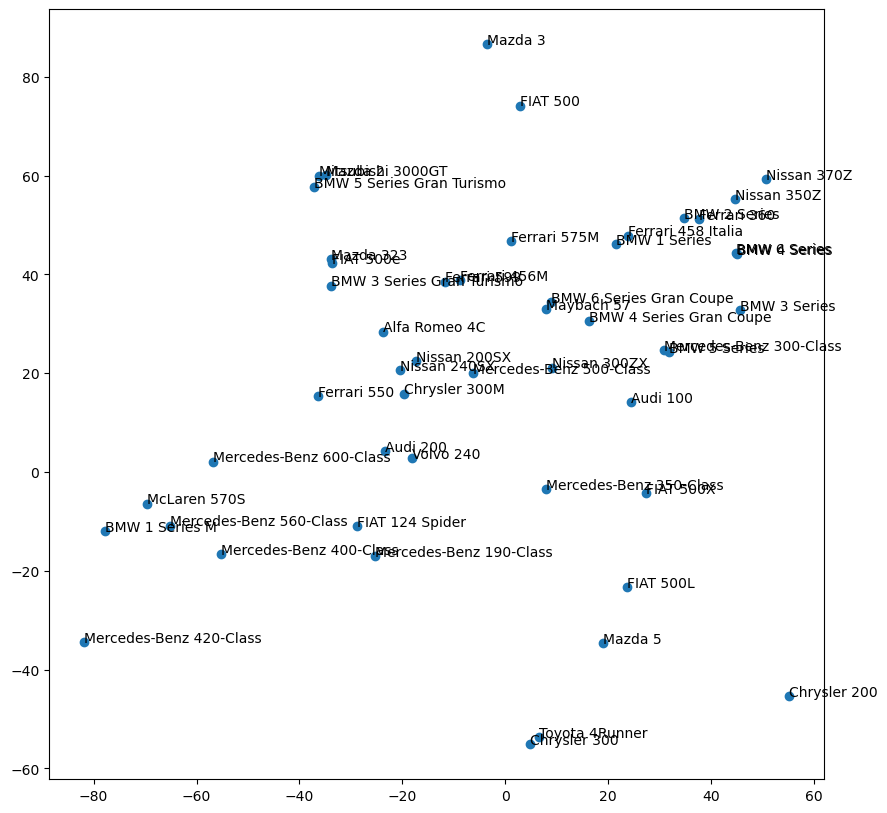

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(Y50[:,0], Y50[:,1])

for i, car in enumerate(cars[:50]):
    plt.annotate(car, xy=(Y50[i,0], Y50[i,1]))